<a href="https://colab.research.google.com/github/gudiseva/AI-Workshop/blob/main/CO2_Emissions_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic: CO2 Emissions

### Importing Required Libraries 

In [14]:
# Essential 
import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sb

# encoding 
from sklearn.preprocessing import LabelEncoder

# Normalization
from sklearn.preprocessing import PolynomialFeatures

# Model Building 
import sklearn
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor as XGB 
from sklearn.ensemble import AdaBoostRegressor as Ada
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import GradientBoostingRegressor as GB

# Evaluation 
from sklearn.metrics import r2_score,mean_squared_error

# Cross Validation 
from sklearn.model_selection import GridSearchCV

In [15]:
#Customised function

def missing_cols(df):
    '''prints out columns with its amount of missing values with its %'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        pct = df[col].isna().mean() * 100
        total += missing_vals
        if missing_vals != 0:
          print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
    
    if total == 0:
        print("no missing values")

### Uploading Training Data

In [16]:
#df = pd.read_csv('train.csv')
df = pd.read_csv('emission_training_data.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2011,HONDA,ACCORD 4DR SEDAN,FULL-SIZE,3.5,6,A5,X,11.7,7.8,9.9,29,228
1,2011,SCION,tC,COMPACT,2.5,4,AS6,X,10.2,7.5,9.0,31,207
2,2011,ROLLS-ROYCE,PHANTOM EWB,FULL-SIZE,6.7,12,A6,Z,20.6,13.4,17.4,16,400
3,2011,CHEVROLET,COLORADO,PICKUP TRUCK - SMALL,2.9,4,A4,X,12.8,9.6,11.3,25,260
4,2011,MAZDA,MAZDA2,COMPACT,1.5,4,M5,X,8.0,6.7,7.4,38,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2011,MERCEDES-BENZ,G 55 AMG,SUV,5.4,8,A5,Z,21.8,17.3,19.8,14,455
755,2011,NISSAN,TITAN,PICKUP TRUCK - STANDARD,5.6,8,A5,X,17.9,12.8,15.6,18,359
756,2011,BMW,M3 CABRIOLET,SUBCOMPACT,4.0,8,M6,Z,17.4,11.9,14.9,19,343
757,2011,CHEVROLET,HHR PANEL,SUV,2.2,4,M5,E,14.2,10.2,12.4,23,198


### Uploading Testing Data

In [17]:
#df2 = pd.read_csv('test.csv')
df2 = pd.read_csv('emissions_testing_data.csv')
df2

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2011,HONDA,PILOT AWD,SUV,3.5,6,A5,X,14.7,10.7,12.9,22
1,2011,CADILLAC,CTS AWD,MID-SIZE,3.6,6,AS6,X,13.2,8.8,11.2,25
2,2011,DODGE,JOURNEY AWD,SUV,3.6,6,AS6,X,14.6,9.9,12.5,23
3,2011,BMW,323i,COMPACT,2.5,6,M6,Z,12.6,8.2,10.6,27
4,2011,GMC,YUKON,SUV,5.3,8,A6,E,21.5,14.7,18.5,15
...,...,...,...,...,...,...,...,...,...,...,...,...
321,2011,NISSAN,GT-R,SUBCOMPACT,3.8,6,AM6,Z,15.5,11.2,13.6,21
322,2011,MERCEDES-BENZ,SLS AMG,TWO-SEATER,6.2,8,AS7,Z,17.3,12.1,15.0,19
323,2011,VOLKSWAGEN,JETTA,COMPACT,2.0,4,AS6,X,10.6,8.0,9.5,30
324,2011,SUBARU,IMPREZA WAGON AWD,STATION WAGON - SMALL,2.5,4,M5,X,12.2,8.8,10.7,26


## EDA

### EDA (Exploratory Data Analysis) is a data analysis technique by which we try to understand the given data and the relationship among those data and also try to find out features , insights and anomalies from the data using statistics and graphical representation.

In [18]:
df = df.drop_duplicates()
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2011,HONDA,ACCORD 4DR SEDAN,FULL-SIZE,3.5,6,A5,X,11.7,7.8,9.9,29,228
1,2011,SCION,tC,COMPACT,2.5,4,AS6,X,10.2,7.5,9.0,31,207
2,2011,ROLLS-ROYCE,PHANTOM EWB,FULL-SIZE,6.7,12,A6,Z,20.6,13.4,17.4,16,400
3,2011,CHEVROLET,COLORADO,PICKUP TRUCK - SMALL,2.9,4,A4,X,12.8,9.6,11.3,25,260
4,2011,MAZDA,MAZDA2,COMPACT,1.5,4,M5,X,8.0,6.7,7.4,38,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2011,MERCEDES-BENZ,G 55 AMG,SUV,5.4,8,A5,Z,21.8,17.3,19.8,14,455
755,2011,NISSAN,TITAN,PICKUP TRUCK - STANDARD,5.6,8,A5,X,17.9,12.8,15.6,18,359
756,2011,BMW,M3 CABRIOLET,SUBCOMPACT,4.0,8,M6,Z,17.4,11.9,14.9,19,343
757,2011,CHEVROLET,HHR PANEL,SUV,2.2,4,M5,E,14.2,10.2,12.4,23,198


In [19]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,759.0,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,2011.0,3.585112,6.068511,14.265876,10.206456,12.439526,24.405797,274.314888
std,0.0,1.383097,1.923483,4.140030,2.801196,3.511612,6.506848,63.647630
min,2011.0,1.000000,2.000000,4.700000,4.900000,4.800000,11.000000,110.000000
25%,2011.0,2.400000,4.000000,11.500000,8.300000,10.100000,20.000000,230.000000
50%,2011.0,3.500000,6.000000,13.400000,9.500000,11.600000,24.000000,265.000000
75%,2011.0,4.700000,8.000000,16.200000,11.500000,14.100000,28.000000,313.000000
max,2011.0,8.000000,16.000000,30.300000,20.400000,25.800000,59.000000,547.000000


In [20]:
df.nunique()

MODELYEAR                     1
MAKE                         38
MODEL                       502
VEHICLECLASS                 15
ENGINESIZE                   45
CYLINDERS                     9
TRANSMISSION                 15
FUELTYPE                      4
FUELCONSUMPTION_CITY        158
FUELCONSUMPTION_HWY         101
FUELCONSUMPTION_COMB        141
FUELCONSUMPTION_COMB_MPG     37
CO2EMISSIONS                142
dtype: int64

In [21]:
df['FUELTYPE'].value_counts()

X    377
Z    302
E     71
D      9
Name: FUELTYPE, dtype: int64

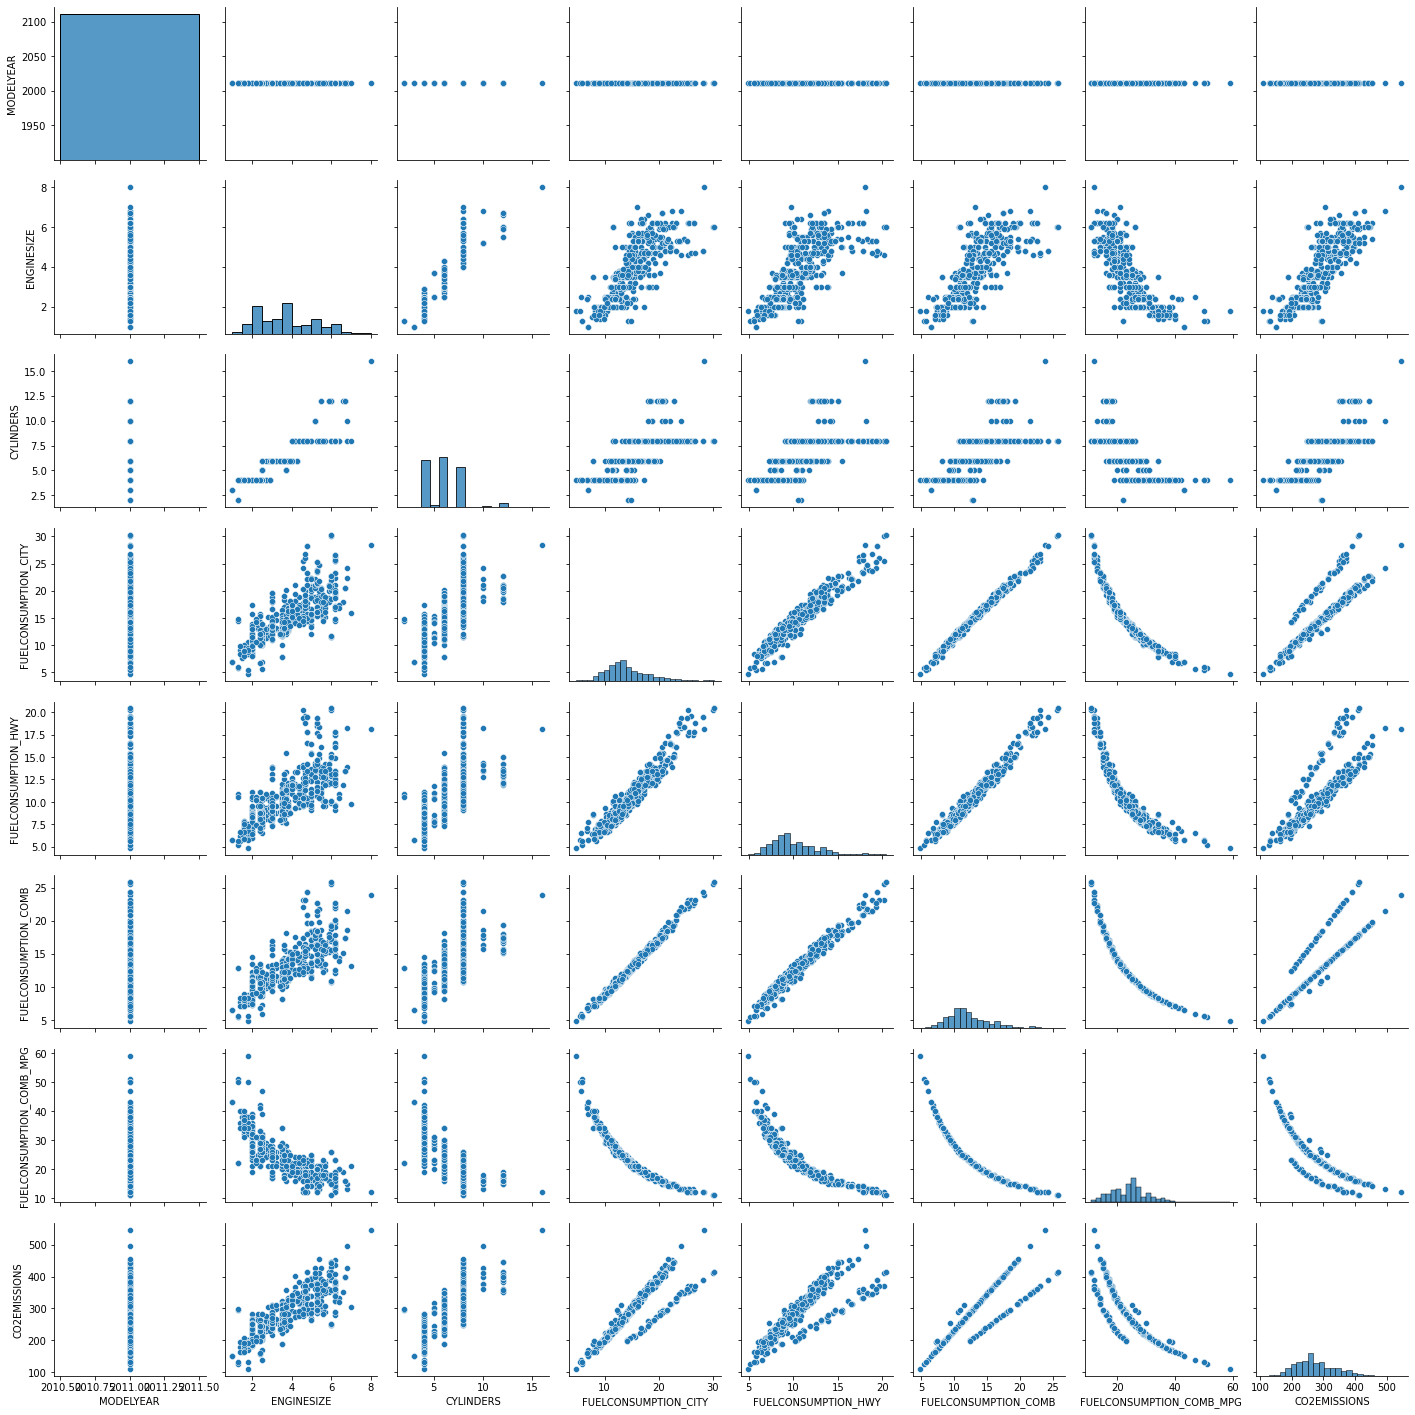

In [22]:
sb.pairplot(df)

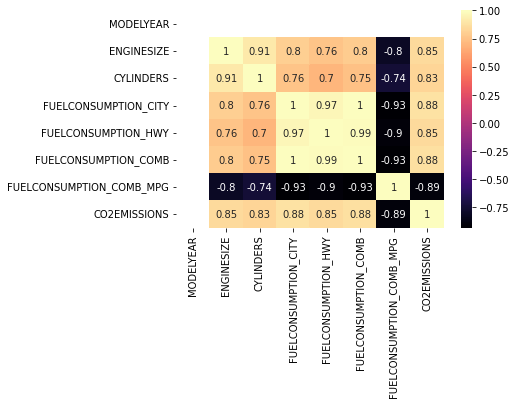

In [23]:
sb.heatmap(df.corr(),annot = True, cmap = 'magma')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


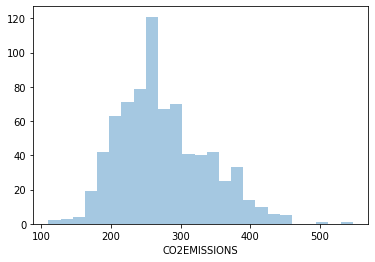

In [24]:
sb.distplot(df['CO2EMISSIONS'], kde = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


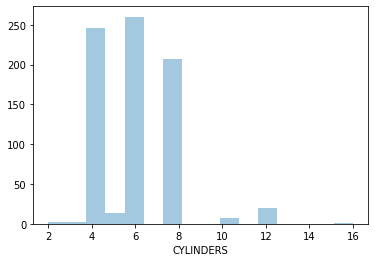

In [25]:
sb.distplot(df['CYLINDERS'], kde = False)

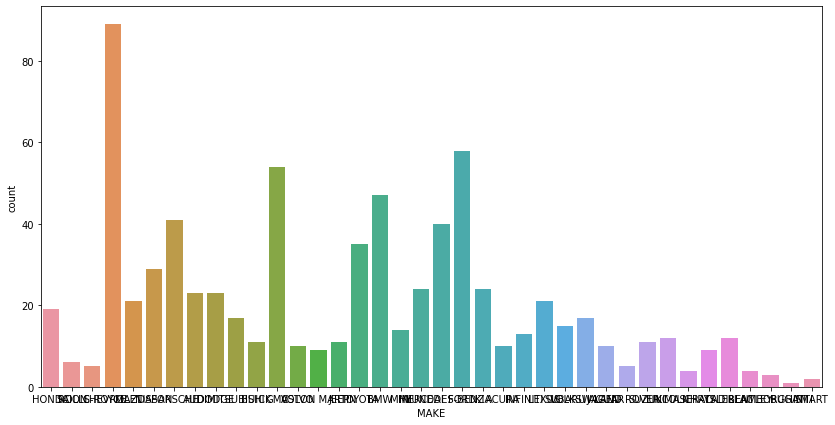

In [26]:
plt.figure(figsize = (14,7))
sb.countplot( x = 'MAKE', data = df)
plt.show()

#plt.grid()

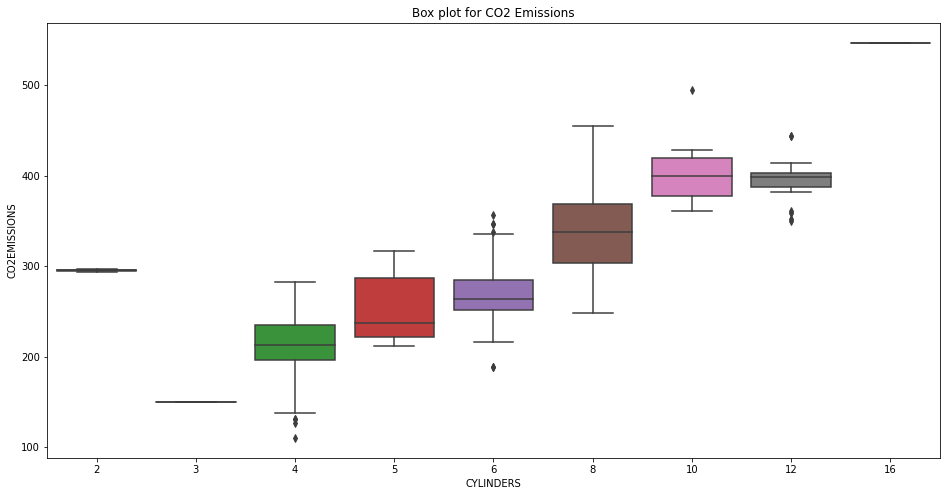

In [27]:
plt.figure(figsize = (16,8))
plt.title("Box plot for CO2 Emissions")
sb.boxplot( y = 'CO2EMISSIONS', x = 'CYLINDERS', data = df)
plt.show()

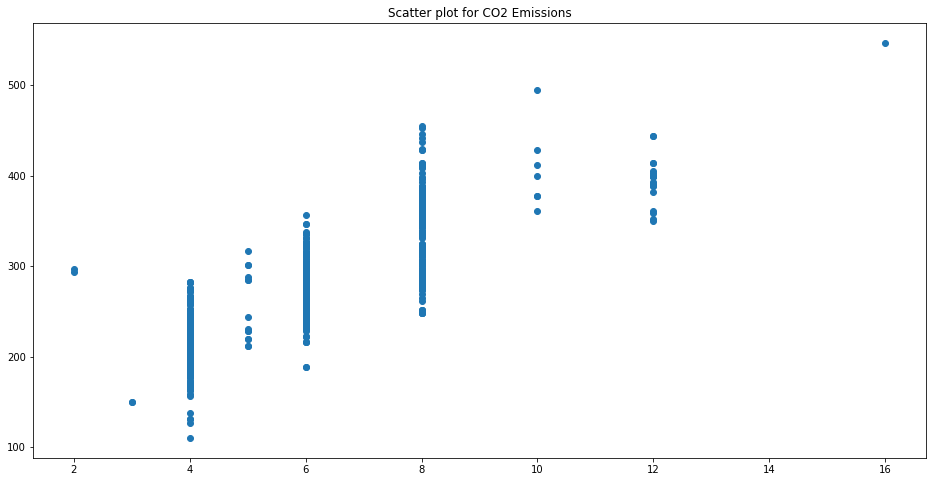

In [28]:
plt.figure(figsize = (16,8))
plt.title("Scatter plot for CO2 Emissions")
plt.scatter(y = 'CO2EMISSIONS', x = 'CYLINDERS', data = df)

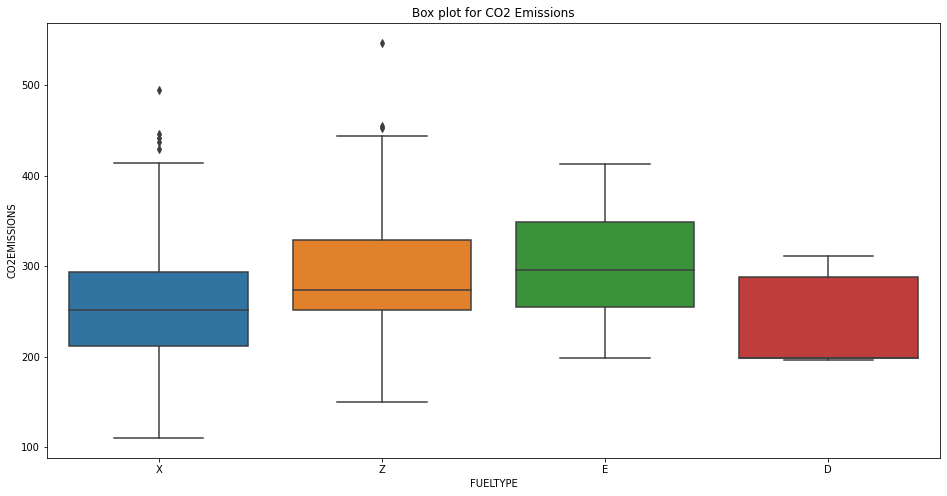

In [29]:
plt.figure(figsize = (16,8))
plt.title("Box plot for CO2 Emissions")
sb.boxplot( y = 'CO2EMISSIONS', x = 'FUELTYPE', data = df)
plt.show()

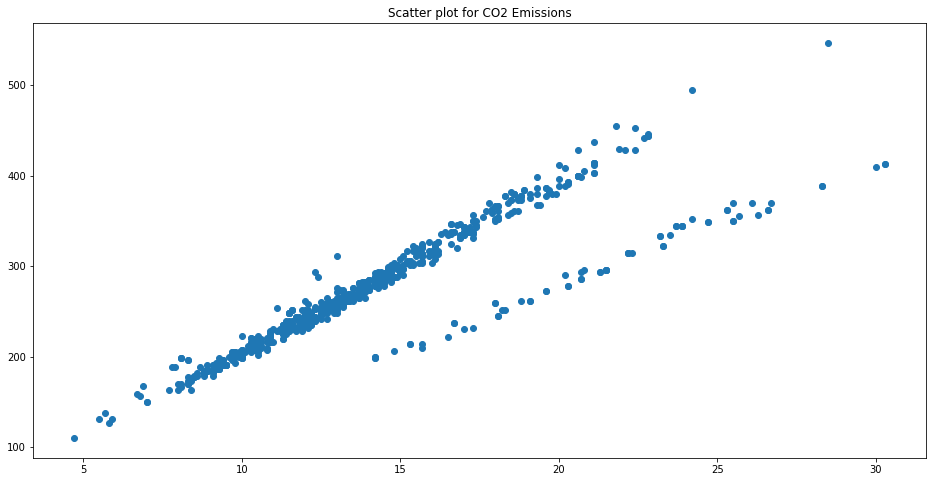

In [30]:
plt.figure(figsize = (16,8))
plt.title("Scatter plot for CO2 Emissions")
plt.scatter(y = 'CO2EMISSIONS', x = 'FUELCONSUMPTION_CITY', data = df)

Text(0.5, 1.0, 'Scatter plot of CO2 Emissions')

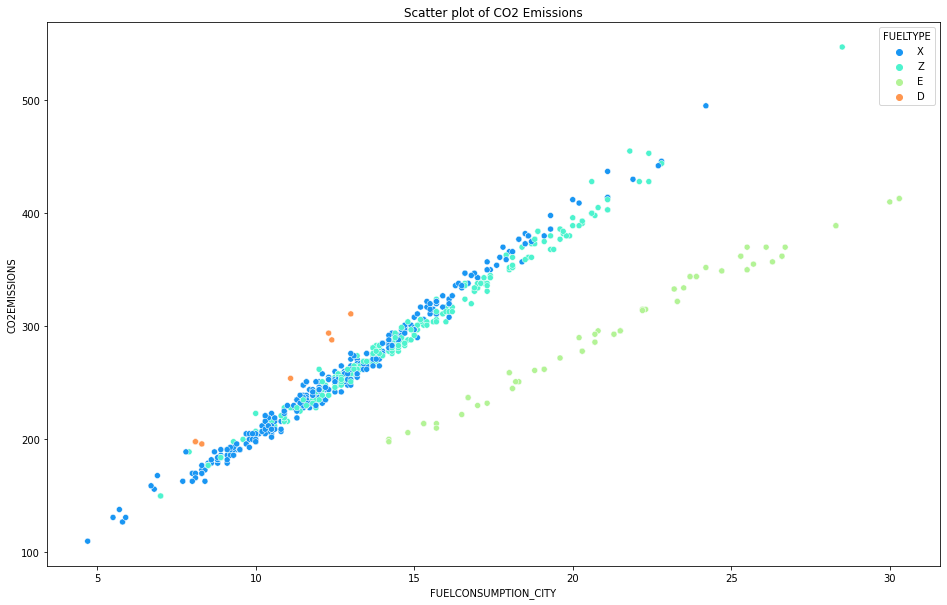

In [31]:
plt.figure(figsize=(16,10))
ax = sb.scatterplot(x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS',data=df, hue = 'FUELTYPE', palette='rainbow')
ax.set_title('Scatter plot of CO2 Emissions')

Text(0.5, 1.0, 'Scatter plot of CO2 Emissions')

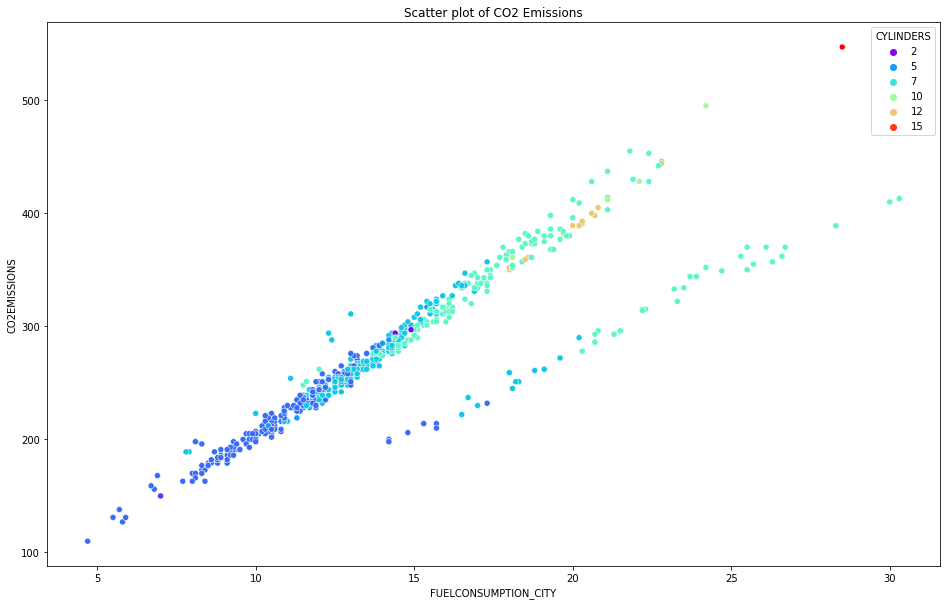

In [32]:
plt.figure(figsize=(16,10))
ax = sb.scatterplot(x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS',data=df, hue = 'CYLINDERS', palette='rainbow')
ax.set_title('Scatter plot of CO2 Emissions')

Text(0.5, 1.0, 'Scatter plot of CO2 Emissions')

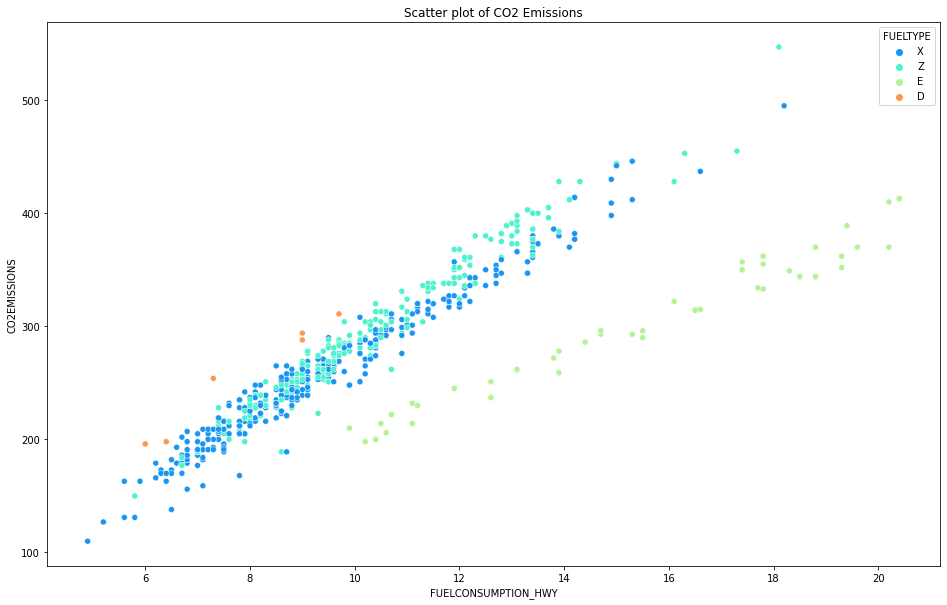

In [33]:
plt.figure(figsize=(16,10))
ax = sb.scatterplot(x='FUELCONSUMPTION_HWY',y='CO2EMISSIONS',data=df, hue = 'FUELTYPE', palette='rainbow')
ax.set_title('Scatter plot of CO2 Emissions')

Text(0.5, 1.0, 'Scatter plot of CO2 Emissions')

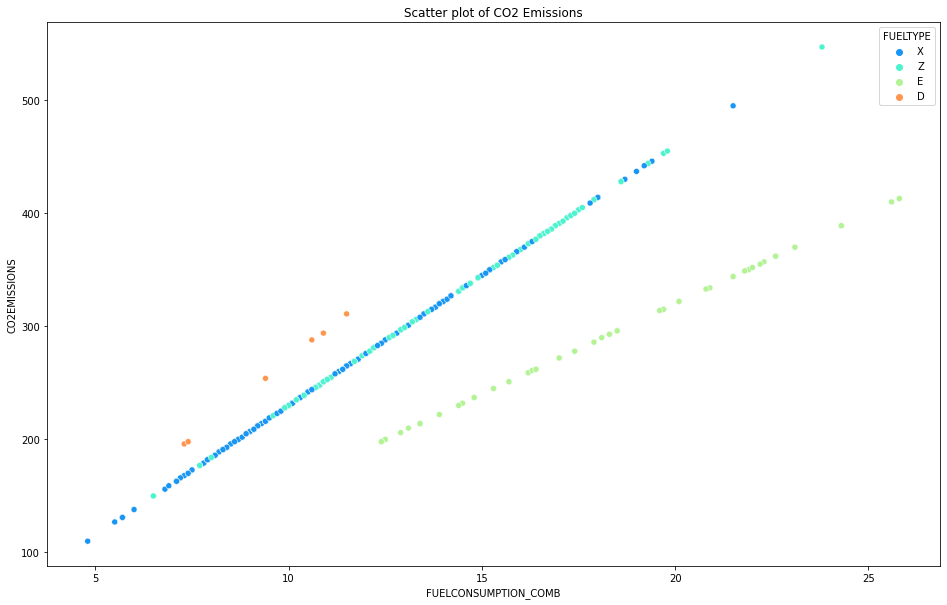

In [34]:
plt.figure(figsize=(16,10))
ax = sb.scatterplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=df, hue = 'FUELTYPE', palette='rainbow')
ax.set_title('Scatter plot of CO2 Emissions')

Text(0.5, 1.0, 'Scatter plot of CO2 Emissions')

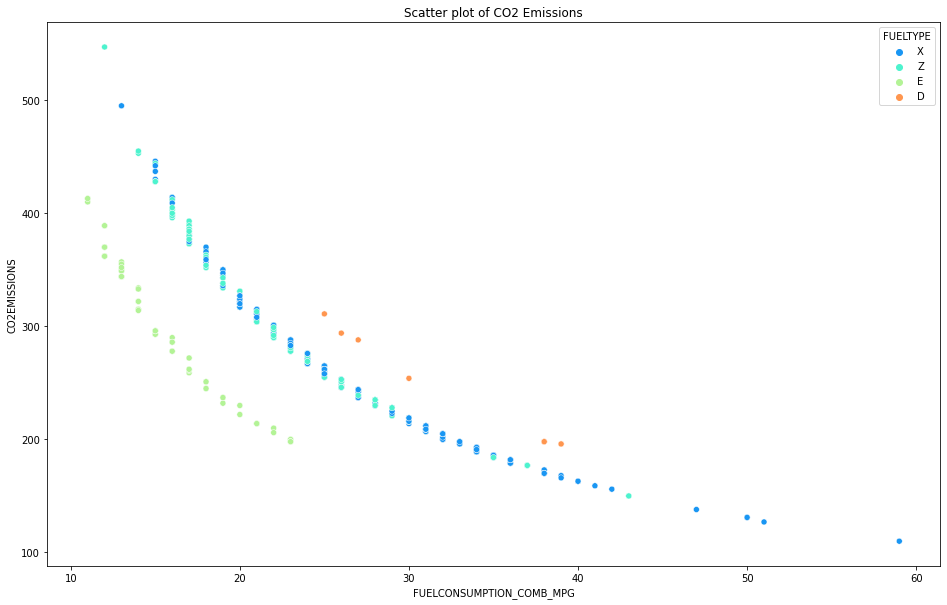

In [35]:
plt.figure(figsize=(16,10))
ax = sb.scatterplot(x='FUELCONSUMPTION_COMB_MPG',y='CO2EMISSIONS',data=df, hue = 'FUELTYPE', palette='rainbow')
ax.set_title('Scatter plot of CO2 Emissions')

### Preprocessing on Training Data

In [36]:
missing_cols(df)

no missing values


In [37]:
df.nunique()

MODELYEAR                     1
MAKE                         38
MODEL                       502
VEHICLECLASS                 15
ENGINESIZE                   45
CYLINDERS                     9
TRANSMISSION                 15
FUELTYPE                      4
FUELCONSUMPTION_CITY        158
FUELCONSUMPTION_HWY         101
FUELCONSUMPTION_COMB        141
FUELCONSUMPTION_COMB_MPG     37
CO2EMISSIONS                142
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 759 non-null    int64  
 1   MAKE                      759 non-null    object 
 2   MODEL                     759 non-null    object 
 3   VEHICLECLASS              759 non-null    object 
 4   ENGINESIZE                759 non-null    float64
 5   CYLINDERS                 759 non-null    int64  
 6   TRANSMISSION              759 non-null    object 
 7   FUELTYPE                  759 non-null    object 
 8   FUELCONSUMPTION_CITY      759 non-null    float64
 9   FUELCONSUMPTION_HWY       759 non-null    float64
 10  FUELCONSUMPTION_COMB      759 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  759 non-null    int64  
 12  CO2EMISSIONS              759 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 103.0+ KB


In [39]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')


In [40]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 759 non-null    int64  
 1   MAKE                      759 non-null    int64  
 2   MODEL                     759 non-null    int64  
 3   VEHICLECLASS              759 non-null    int64  
 4   ENGINESIZE                759 non-null    float64
 5   CYLINDERS                 759 non-null    int64  
 6   TRANSMISSION              759 non-null    int64  
 7   FUELTYPE                  759 non-null    int64  
 8   FUELCONSUMPTION_CITY      759 non-null    float64
 9   FUELCONSUMPTION_HWY       759 non-null    float64
 10  FUELCONSUMPTION_COMB      759 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  759 non-null    int64  
 12  CO2EMISSIONS              759 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 103.0 KB
None


In [41]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2011,13,61,1,3.5,6,1,2,11.7,7.8,9.9,29,228
1,2011,31,499,0,2.5,4,9,2,10.2,7.5,9.0,31,207
2,2011,30,336,1,6.7,12,2,3,20.6,13.4,17.4,16,400
3,2011,8,112,5,2.9,4,0,2,12.8,9.6,11.3,25,260
4,2011,24,302,0,1.5,4,13,2,8.0,6.7,7.4,38,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2011,25,224,11,5.4,8,1,3,21.8,17.3,19.8,14,455
755,2011,28,432,6,5.6,8,1,2,17.9,12.8,15.6,18,359
756,2011,4,292,10,4.0,8,14,3,17.4,11.9,14.9,19,343
757,2011,8,255,11,2.2,4,13,1,14.2,10.2,12.4,23,198


### Preprocessing on Testing Data

In [42]:
objList = df2.select_dtypes(include = "object").columns
print (objList)

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')


In [43]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df2[feat] = le.fit_transform(df2[feat].astype(str))

print (df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 326 non-null    int64  
 1   MAKE                      326 non-null    int64  
 2   MODEL                     326 non-null    int64  
 3   VEHICLECLASS              326 non-null    int64  
 4   ENGINESIZE                326 non-null    float64
 5   CYLINDERS                 326 non-null    int64  
 6   TRANSMISSION              326 non-null    int64  
 7   FUELTYPE                  326 non-null    int64  
 8   FUELCONSUMPTION_CITY      326 non-null    float64
 9   FUELCONSUMPTION_HWY       326 non-null    float64
 10  FUELCONSUMPTION_COMB      326 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  326 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 30.7 KB
None


### xVar & yVar

In [44]:
xVar = df.drop(['CO2EMISSIONS'], axis = 1)
xVar

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2011,13,61,1,3.5,6,1,2,11.7,7.8,9.9,29
1,2011,31,499,0,2.5,4,9,2,10.2,7.5,9.0,31
2,2011,30,336,1,6.7,12,2,3,20.6,13.4,17.4,16
3,2011,8,112,5,2.9,4,0,2,12.8,9.6,11.3,25
4,2011,24,302,0,1.5,4,13,2,8.0,6.7,7.4,38
...,...,...,...,...,...,...,...,...,...,...,...,...
754,2011,25,224,11,5.4,8,1,3,21.8,17.3,19.8,14
755,2011,28,432,6,5.6,8,1,2,17.9,12.8,15.6,18
756,2011,4,292,10,4.0,8,14,3,17.4,11.9,14.9,19
757,2011,8,255,11,2.2,4,13,1,14.2,10.2,12.4,23


In [45]:
yVar = df['CO2EMISSIONS']
yVar

0      228
1      207
2      400
3      260
4      170
      ... 
754    455
755    359
756    343
757    198
758    333
Name: CO2EMISSIONS, Length: 759, dtype: int64

### Train-test Split

In [46]:
#data split

X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.25, random_state = 0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(569, 12) (569,)
(190, 12) (190,)


In [47]:
#test data 

X_test = df2
X_test

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2011,11,183,10,3.5,6,1,2,14.7,10.7,12.9,22
1,2011,5,77,2,3.6,6,9,2,13.2,8.8,11.2,25
2,2011,8,150,10,3.6,6,9,2,14.6,9.9,12.5,23
3,2011,3,6,0,2.5,6,14,3,12.6,8.2,10.6,27
4,2011,10,263,10,5.3,8,2,1,21.5,14.7,18.5,15
...,...,...,...,...,...,...,...,...,...,...,...,...
321,2011,26,135,9,3.8,6,5,3,15.5,11.2,13.6,21
322,2011,23,224,11,6.2,8,10,3,17.3,12.1,15.0,19
323,2011,31,146,0,2.0,4,9,2,10.6,8.0,9.5,30
324,2011,28,142,8,2.5,4,13,2,12.2,8.8,10.7,26


In [48]:
#test data

X_train = xVar
y_train = yVar
print (X_train.shape, y_train.shape)
print (X_test.shape)

(759, 12) (759,)
(326, 12)


## Scaling and Normalization

### Reference: 
https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

In [49]:
## Scaling ## Not performed for this dataset 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [50]:
## PolynomialFeatures improves accuracy of Linear regression but not necessarily of decision tree based algorithms 

quad = PolynomialFeatures (degree = 2)

X_train = quad.fit_transform(X_train)
X_test = quad.fit_transform(X_test)

## Simple Linear Regression

### Reference:
https://www.youtube.com/watch?app=desktop&v=U7D1h5bbpcs&feature=youtu.be

In [51]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


model = sm.OLS(y_train, X_train)
model = model.fit()
print(model.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.981    
Dependent Variable: CO2EMISSIONS     AIC:                5532.3233
Date:               2022-01-13 10:38 BIC:                5893.6194
No. Observations:   759              Log-Likelihood:     -2688.2  
Df Model:           77               F-statistic:        503.8    
Df Residuals:       681              Prob (F-statistic): 0.00     
R-squared:          0.983            Scale:              77.788   
------------------------------------------------------------------
         Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
------------------------------------------------------------------
const    291.9435    2.2941 127.2571 0.0000    287.4391   296.4479
x1         0.0000    0.0000   3.3167 0.0010      0.0000     0.0000
x2         0.8495    0.4930   1.7232 0.0853     -0.1185     1.8174
x3        -0.7124    0.4000  -1.7810 0.0754     -1.4978     0.0730
x4         0.

In [53]:
predictions = model.predict(X_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

ValueError: ignored

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(RMSE, r2)

In [ ]:
# Plot the actual vs predicted results
plt.figure(figsize=(16,10))
sb.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

#Plot the diagonal line
d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

## Different Algorithms 

In [ ]:
# Implementing models

# Linear Regression
linear = LR()
lr = linear.fit(X_train, y_train)
lr.score(X_test,y_test)

In [ ]:
# Adaboost Regressor

ada = Ada(random_state=0)

ada_ = ada.fit(X_train, y_train)

ada_.score(X_test,y_test)

In [ ]:
# XGB Regressor

xgbregressor = XGB(random_state=0)

xgb_ = xgbregressor.fit(X_train, y_train)

xgb_.score(X_test,y_test)

In [ ]:
# Decision Tree Regressor

dtr = DT(criterion="mse",
        max_depth=6,
        max_features="auto",
        random_state=0)

dtr_ = dtr.fit(X_train, y_train)

dtr_.score(X_test,y_test)

In [ ]:
# Random Tree Regressor

rfr = RF(n_estimators=100,
        criterion="mse",
        max_depth=6,
        max_features="auto",
        random_state=0)

rfr_ = rfr.fit(X_train, y_train)

rfr_.score(X_test,y_test)

## How to check if model is overfitting or not 

In [ ]:
forest = RF(n_estimators = 500,
            criterion = 'mse',
            random_state = 0,
            n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))

print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

### Validating Models

In [ ]:
lr_pred = lr.predict(X_test)
ada_pred = ada_.predict(X_test)
xgb_pred = xgb_.predict(X_test)
dtr_pred = dtr_.predict(X_test)
rfr_pred = rfr_.predict(X_test)

In [ ]:
# Plot the actual vs predicted results
plt.figure(figsize=(16,16))
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})

sb.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In [ ]:
# Plot the actual vs predicted results
plt.figure(figsize=(16,16))
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': xgb_pred})

sb.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
linear_mse = mean_squared_error(y_test, lr_pred)
ada_mse = mean_squared_error(y_test, ada_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)
dtr_mse = mean_squared_error(y_test, dtr_pred)
rfr_mse = mean_squared_error(y_test, rfr_pred)

In [ ]:
print(pow(linear_mse, 0.5))
print(pow(ada_mse, 0.5))
print(pow(xgb_mse, 0.5))
print(pow(dtr_mse, 0.5))
print(pow(rfr_mse, 0.5))

## Let's try to Improve the Model 

### XGBoost Model 

In [ ]:
## Note: It may take a few minutes. 

xgb1 = XGBR()
parameters = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [0.01, 0.03, 0.1],
              'max_depth': [5, 6, 7],
              'min_child_weight': [1, 5],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'n_estimators': [500],
              'gamma': [0.5, 1, 1.5, 2, 5]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        scoring='mean_squared_error',
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
xgboost = XGB(learning_rate=0.04,
                       nthread = 4,
                       n_estimators=500,
                       max_depth=5,
                       min_child_weight=1,
                       gamma=1.5,
                       objective='reg:squarederror',
                       subsample= 0.8,
                       random_state=42)

xgb = xgboost.fit(X_train, y_train)

### Prediction 

In [ ]:
prediction = xgb.predict(X_test)
prediction

### RMSE Calculation for training data

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, prediction))
print(RMSE)

In [ ]:
# Plot the actual vs predicted results
plt.figure(figsize=(16,16))
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

sb.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

d_line= np.arange(df_results.min().min(), df_results.max().max())
plt.plot(d_line, d_line, color='red', linestyle='--')
plt.show()

## Decision Tree Regressor 

### Convert into csv 

In [ ]:
from pandas import DataFrame
df3 = DataFrame(prediction,columns=['CO2EMISSIONS'], index = False)

In [ ]:
df3.to_csv('submission.csv')

# End of code